In [1]:
import re
import networkx as nx
import matplotlib.pyplot as plt
import os
import pandas as pd
import operator
import community
from __future__ import division
%matplotlib inline

In [115]:
#first part was retrieving the data which is ouputted as csv files containg
#course information for each course within each department
#next part is about creating a network of all the courses
#firstly the csv files containing the data are loaded into python
#overview of csv files content:
#checkout assignment 2 for some network analysis 

#COURSE NUMBER,COURSE NAME,LANGUAGE OF INSTRUCTION,CREDIT LOAD,YEAR,SCHEDULE,COURSE TYPE,DEPARTMENT,GENERAL COURSE OBJECTIVES,LEARNING OBJECTIVES,CONTENT,RECOMMENDED PREREQUISITES,COURSE RESPONSIBLE

rootdir='C:/Users/DRC/Desktop/social_csv_folder'
list_of_df_for_each_department=[]
for filename in os.listdir(rootdir):
    if filename.endswith('.csv'):
        #print filename
        df=pd.read_csv(rootdir+"/"+filename,converters={'COURSE NUMBER': lambda x: str(x),'RECOMMENDED PREREQUISITES':lambda x: str(x)})
        df2=df.dropna(thresh=11)
        list_of_df_for_each_department.append(df2)

In [116]:
len(list_of_df_for_each_department)

21

In [117]:
list_of_df_for_each_department[0]

COURSE NUMBER                                        COURSE NAME  \
1           01003                 Advanced Engineering Mathematics 1   
3           01005                 Advanced Engineering Mathematics 1   
5           01006                 Advanced Engineering Mathematics 1   
7           01015                 Advanced Engineering Mathematics 1   
9           01016                 Advanced Engineering Mathematics 1   
11          01017                               Discrete Mathematics   
13          01018                    Discrete mathematics 2: algebra   
15          01025   Advanced Mathematics 2 for Mathematics and Te...   
17          01035                 Advanced Engineering Mathematics 2   
19          01036     Mathematical Methods in Structural Engineering   
21          01125   Fundamental topological concepts and metric s...   
23          01227                                       Graph Theory   
25          01236       Differential Geometry of Curves and Surfaces   
27          01237        Differential geometry and parametric design   
29          01257                                Advanced Modelling    
31          01325                        Mathematics 4 Real Analysis   
33          01405                                    Algebraic error   
35          01410                                       Cryptology 1   
37          01415                 Computational Discrete Mathematics   
39          01418     Introduction to Partial Differential Equations   
41          01426                                       Cryptology 2   
43          01427                      Advanced topics in cryptology   
45          01527                                    Graph Theory II   
47          01617                                Dynamical Systems 1   
49          01618                                Dynamical Systems 2   
51          01666                                      Project work    
53          01715                                Functional Analysis   
55          01716     Advanced Topics in Applied Functional Analysis   
57          01901                             Calculus and algebra 1   
59          01902                             Calculus and algebra 2   
..            ...                                                ...   
343         02685    Scientific Computing for differential equations   
345         02692    Introduction to programming and data processing   
347         02805                     Social graphs and interactions   
349         02806             Social data analysis and visualization   
351         02807                   Computational Tools for Big Data   
353         02808   Personal Data Interaction for Mobile and Wear...   
355         02809                              UX Design Prototyping   
357         02823          Introduction to Computer Game Prototyping   
359         02826                     Sound Design for Digital Media   
361         02830      Advanced Project in Digital Media Engineering   
363         02840     Computer Game Programming Fundamentals (DADIU)   
365         02841   Computer Game Programming in a Production (DA...   
367         02901                Advanced Topics in Machine Learning   
369         02904                     Advanced System Identification   
371         02906                   Introduction to Inverse Problems   
373         02910                        Computational data analysis   
375         02913                       Advanced Analysis Techniques   
377         02921                     ITMAN Graduate School Seminars   
379         02930          The Analysis of Sensory and Consumer Data   
381         02932          Empirical Research Methods in Informatics   
383         02935   Introduction to applied statistics and R for ...   
385         02936                             Bayesian Data Analysis   
387         02938                               Statistical Genetics   
389         02940           Modern Methods i

In [118]:
super_list_of_nodes=[]
for i in range(0,len(list_of_df_for_each_department)):
               list_of_nodes=list_of_df_for_each_department[i]['COURSE NUMBER'].tolist()
               super_list_of_nodes.append(list_of_nodes)
               
super_list_of_links=[]
for i in range(0,len(list_of_df_for_each_department)):
               list_of_nodes=list_of_df_for_each_department[i]['RECOMMENDED PREREQUISITES'].tolist()
               super_list_of_links.append(list_of_nodes)

In [119]:
list_of_dicts=[]
for i in range(0,len(super_list_of_nodes)):
    sub_dict={}
    for j in range(0,len(super_list_of_nodes[i])):
        sub_dict[super_list_of_nodes[i][j]]=super_list_of_links[i][j]
    list_of_dicts.append(sub_dict)


In [120]:
new_list_of_dicts=[]
for i in range(0,len(list_of_dicts)):
    new_dict_list_of_links={}
    for k,v in list_of_dicts[i].items():
        try:
            temp_list=re.findall('\w+',v)
            new_dict_list_of_links[k]=temp_list
        except TypeError:
            pass
    new_list_of_dicts.append(new_dict_list_of_links)

In [121]:
#new_list_of_dicts

In [122]:
new_dict={ k: v for d in new_list_of_dicts for k, v in d.items() }

In [123]:
final_length=0
for i in range(0,len(new_list_of_dicts)):
    final_length = final_length + len(new_list_of_dicts[i])
print final_length

1696


In [124]:
c=0
color_map_list=[]
for i in range(0,len(new_list_of_dicts)):
    c= c + 1
    for i in range(0,len(new_list_of_dicts[i].keys())):
        color_map_list.append((c))
len(color_map_list)

1696

In [125]:
temp_dict={}
for k,v in new_dict.items():
    for item in v: 
        temp_dict[k]=item

In [126]:
tuple_list_links=temp_dict.items()
tuple_list_links

[('34153 ', '10370'),
 ('28242 ', '01035'),
 ('12701 ', 'None'),
 ('62581 ', '62420'),
 ('31384 ', '31371'),
 ('42002 ', '01005'),
 ('42011 ', 'None'),
 ('02102', 'None'),
 ('02101', 'None'),
 ('02105', '01917'),
 ('10036 ', '10033'),
 ('62549 ', '62402'),
 ('11031 ', '11951'),
 ('11946 ', 'None'),
 ('42062 ', '42042'),
 ('KU105 ', 'None'),
 ('34539 ', '34041'),
 ('KU005 ', '01035'),
 ('KU012 ', 'None'),
 ('11000 ', 'None'),
 ('28123 ', '28022'),
 ('31547 ', '31545'),
 ('42490 ', 'None'),
 ('30530 ', 'None'),
 ('62338 ', 'None'),
 ('02350', '02161'),
 ('02947', 'None'),
 ('62739 ', '62738'),
 ('42B70 ', 'None'),
 ('47326 ', '47325'),
 ('46300 ', '02631'),
 ('30120 ', '10033'),
 ('11833 ', 'None'),
 ('31371 ', '02101'),
 ('31343 ', 'None'),
 ('41344', '41401'),
 ('41346', '41344'),
 ('41343', '41401'),
 ('41342', '41533'),
 ('01025', '01005'),
 ('11331 ', '41205'),
 ('62254 ', '62334'),
 ('34540 ', '34033'),
 ('30010 ', '02102'),
 ('62194 ', 'None'),
 ('11909 ', '11981'),
 ('47304 ', '2

In [136]:
G=nx.DiGraph()
G.add_nodes_from(new_dict.keys())
G.add_edges_from(tuple_list_links)
#G=nx.DiGraph(new_dict)
#print str(count / size)    
#nx.draw(G,pos, edge_color='#535154',node_color=color_map_list,node_size=50,cmap = plt.get_cmap('jet'),with_labels=False)
#plt.show()

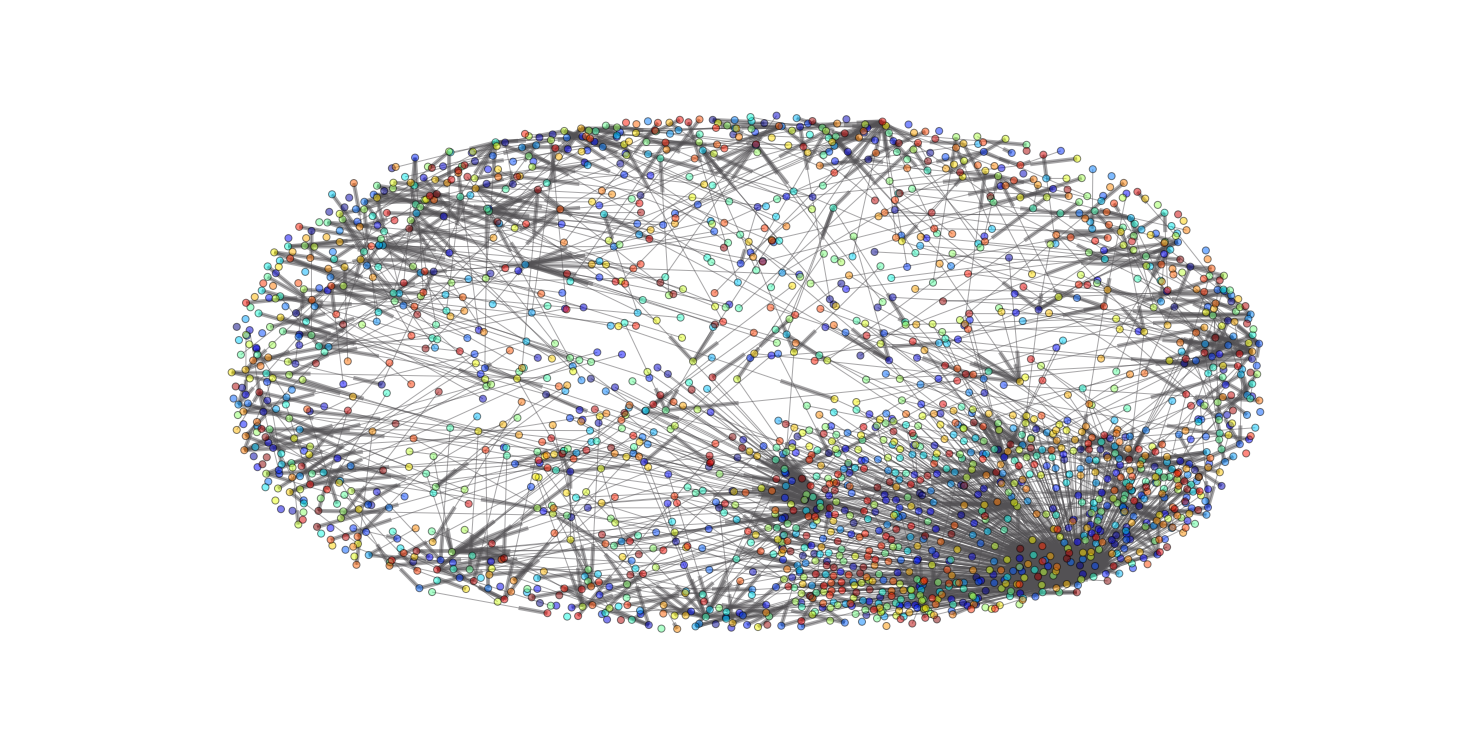

In [137]:
plt.figure(num=None, figsize=(20, 10), dpi=1500)   
pos = nx.spring_layout(G,scale=5, k=0.15, iterations=50)
nx.draw(G,pos, edge_color='#535154',node_color=range(len(G.nodes())),node_size=50,cmap = plt.get_cmap('jet'),with_labels=False,alpha=0.5)
plt.show()

In [138]:
deg_cen=nx.degree_centrality(G)
clo_cen=nx.closeness_centrality(G)
disp=nx.dispersion(G)

In [139]:
clo_cen

{'34153 ': 0.0004928536224741252,
 '28242 ': 0.0007392804337111878,
 '12701 ': 0.0004928536224741252,
 '62581 ': 0.0004928536224741252,
 '28892 ': 0.0,
 '26371': 0.0,
 '42011 ': 0.0004928536224741252,
 '62505 ': 0.0004928536224741252,
 '02102': 0.0004928536224741252,
 '02101': 0.0004928536224741252,
 '62570 ': 0.0,
 '02105': 0.0004928536224741252,
 '10036 ': 0.0004928536224741252,
 '62549 ': 0.0004928536224741252,
 '11031 ': 0.0004928536224741252,
 '11946 ': 0.0004928536224741252,
 '42062 ': 0.0004928536224741252,
 'KU105 ': 0.0004928536224741252,
 '02249': 0.0004928536224741252,
 'KU005 ': 0.0007392804337111878,
 'KU012 ': 0.0004928536224741252,
 '88701 ': 0.0,
 '11000 ': 0.0004928536224741252,
 '62579 ': 0.0004928536224741252,
 '28123 ': 0.0004928536224741252,
 '24003 ': 0.0,
 '31015 ': 0.0,
 '42490 ': 0.0004928536224741252,
 '30530 ': 0.0004928536224741252,
 '31384 ': 0.0004928536224741252,
 '62338 ': 0.0004928536224741252,
 '42051': 0.0,
 '02350': 0.0007392804337111878,
 '42002 ': 

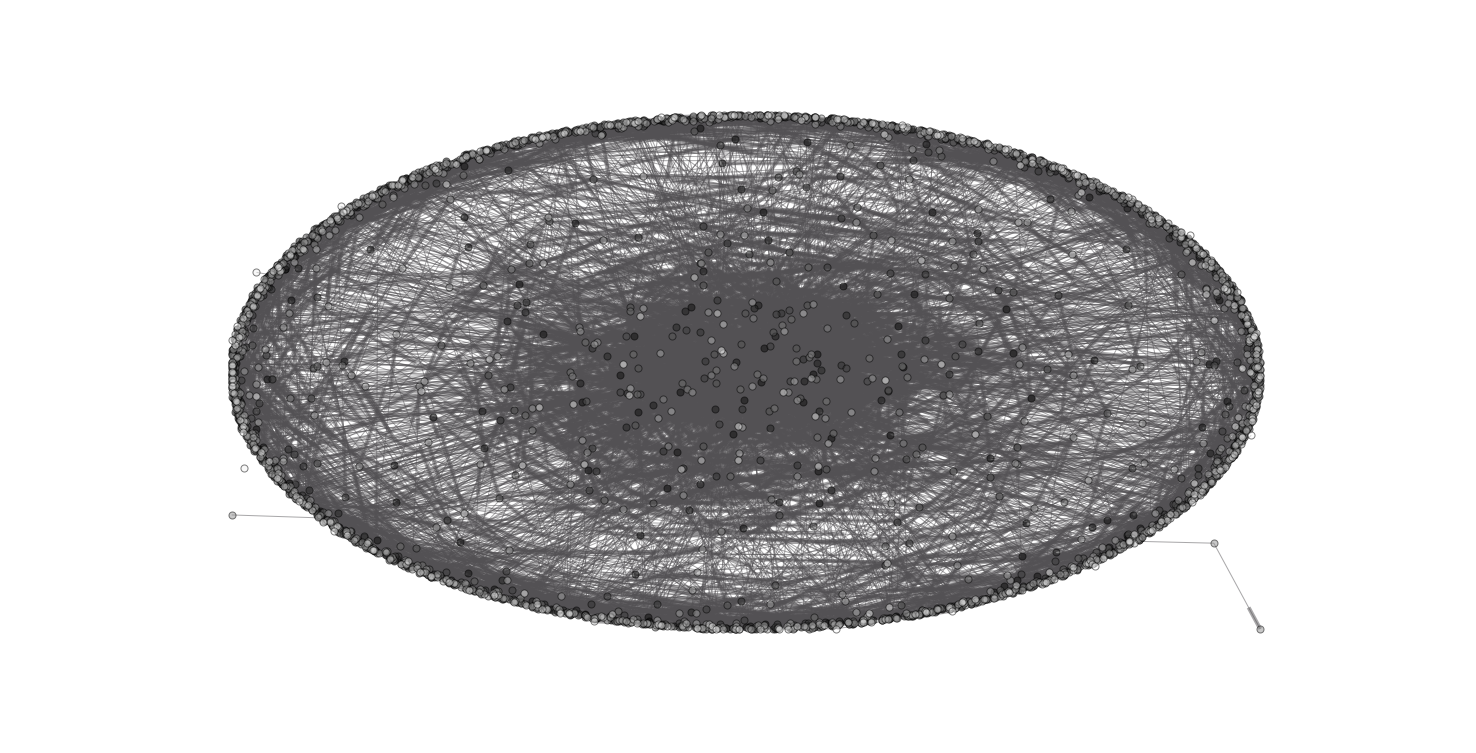

In [132]:
plt.figure(num=None, figsize=(20, 10), dpi=1500)
size=len(new_list_of_dicts)
count=0
values=[]
for i in range(0,len(new_list_of_dicts)):
    count = count + 1
    G=nx.DiGraph(new_list_of_dicts[i])
    pos = nx.spring_layout(G,scale=5, k=0.15, iterations=50)
    #print str(count / size)
    values.append(count)
    nx.draw(G,pos, edge_color='#535154',node_size=50,node_color = str(count/size),alpha=0.5,cmap = plt.get_cmap('jet'),with_labels=False)
    

#nx.draw_networkx_edges(G,pos,alpha=0.5,cmap = plt.get_cmap('jet'),with_labels=False,node_color=values )
plt.show()

In [16]:
#using  networkx to create the prober subgraph using the weakly connected component (WCC)
#generating corresponding undirected graph to the philosopher directed graph
#G=nx.DiGraph(new_dict_list_of_links)
#G = max(nx.weakly_connected_component_subgraphs(G,copy=True),key=len)
H = G.to_undirected()

In [17]:
len(G.nodes())

25

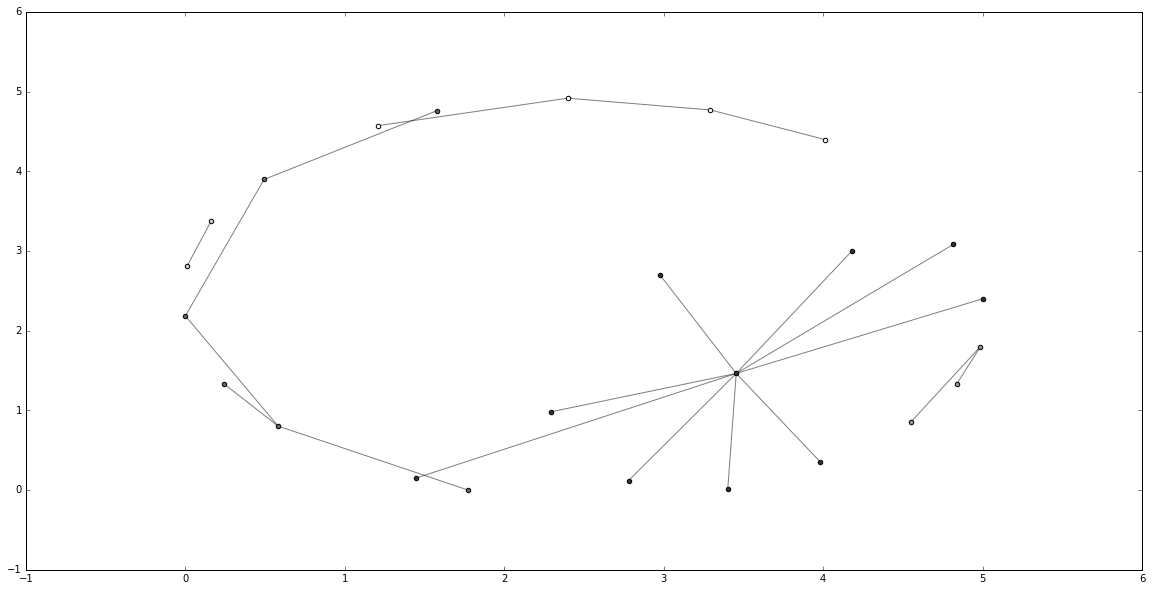

In [18]:
#first compute the best partition
partition = community.best_partition(H)

#drawing
plt.figure(num=None, figsize=(20, 10), dpi=1500)    
size = float(len(set(partition.values())))
pos=nx.spring_layout(H, scale=5)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(H, pos, list_nodes, node_size = 20, node_color = str(count / size))

nx.draw_networkx_edges(H,pos,alpha=0.5)
plt.show()

In [19]:
#merging all the departments into one dataframe
merged_df=pd.concat([list_of_df_for_each_department[0],list_of_df_for_each_department[1],list_of_df_for_each_department[2],list_of_df_for_each_department[3],list_of_df_for_each_department[4],list_of_df_for_each_department[5],list_of_df_for_each_department[6],list_of_df_for_each_department[7],list_of_df_for_each_department[8],list_of_df_for_each_department[9],list_of_df_for_each_department[10],list_of_df_for_each_department[11],list_of_df_for_each_department[12],list_of_df_for_each_department[13],list_of_df_for_each_department[14],list_of_df_for_each_department[15],list_of_df_for_each_department[16],list_of_df_for_each_department[17],list_of_df_for_each_department[18],list_of_df_for_each_department[19],list_of_df_for_each_department[20]])

In [20]:
list_of_nodes=merged_df['COURSE NUMBER'].tolist()

In [21]:
#we create a dict with course names and correponding course number
#since it will come in handy later
list_of_nodes_names=merged_df['COURSE NAME'].tolist()

In [22]:
course_dict={}
for i in range(0,len(list_of_nodes_names)):
    course_dict[list_of_nodes_names[i]]=list_of_nodes[i]

In [23]:
# now we list the links by using the prerequisites of each course
list_of_prerequistites=merged_df['RECOMMENDED PREREQUISITES'].tolist()

In [24]:
#list_of_prerequistites[:50]

In [25]:
#use list_of_nodes
#we create a dict that contain the nodes and its prerequisites
links_dict={}
for i in range(0,len(list_of_nodes)):
    links_dict[list_of_nodes[i]]=list_of_prerequistites[i]



In [26]:
#links_dict.items()[45]

In [27]:
#re.findall('\d+',links_dict.values()[45])

In [28]:
#the prerequistites (represented by course number) are in a string format, so it is neccessary to utilize a reqular expression to extract the course numbers in each "string" of course numbers (courses that are prerequisites) and list them in a pythong list numerical objcet
#this extraction code ignores and passes prerequisites that are nan or none values i.e. non-existent prerequisites (no outgoing links). 
new_dict_list_of_links={}
for k,v in links_dict.items():
    try:
        temp_list=re.findall('\d+',v)
        new_dict_list_of_links[k]=temp_list
    except TypeError:
        pass

In [29]:
#new_dict_list_of_links.items()[45]

In [30]:
#new_dict_list_of_links[41078.0]

In [31]:
#for i in new_dict_list_of_links[41078.0]:
#    print i

In [32]:
#creating the graph using this dictionairy with nodes as keys and links as lists
G=nx.DiGraph(new_dict_list_of_links)
#nx.draw(G)

In [33]:
#number of_edges
len(G.edges())

2772

In [34]:
#number of nodes
len(G.nodes())

2345

In [35]:
#list of tuples
list_of_links=G.edges()

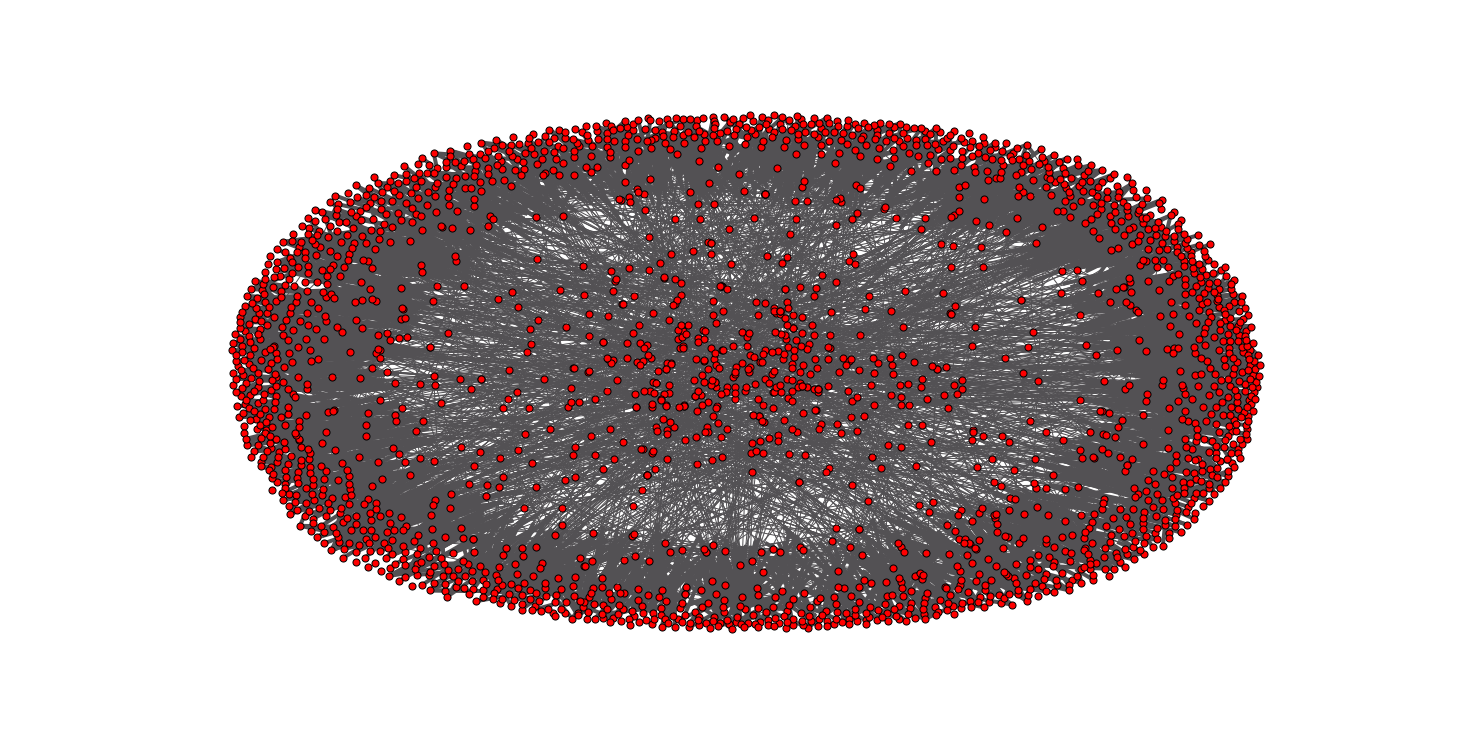

In [36]:
pos = pos=nx.spring_layout(G, scale=5)
plt.figure(num=None, figsize=(20, 10), dpi=1500)
nx.draw(G,pos, edge_color='#535154',node_size=50)
plt.show()

In [37]:
deg_cen=nx.degree_centrality(G)
in_deg_cen=nx.in_degree_centrality(G)
out_deg_cen=nx.degree_centrality(G)
between_cen=nx.betweenness_centrality(G)
edge_betw_cen=nx.edge_betweenness_centrality(G)
eigen_cen=nx.eigenvector_centrality(G)

In [38]:
WC=list(nx.weakly_connected_component_subgraphs(G))

In [39]:
largest = max(nx.weakly_connected_component_subgraphs(G),key=len)

In [40]:
#[len(c) for c in sorted(nx.weakly_connected_components(G), key=len, reverse=True)]

In [41]:
#largest_cc = max(nx.weakly_connected_components(G), key=len)

In [42]:
#Getting eigenvalue centrality for each node(philosopher) in-degree and out-degree using the networkx package
in_eigen_centrality = nx.eigenvector_centrality(G)
out_eigen_centrality = G.reverse()
out_eigen_centrality = nx.eigenvector_centrality(out_eigen_centrality)
sorted_in_eigen_centrality= sorted(in_eigen_centrality.items(), key=operator.itemgetter(1),reverse=True)
sorted_out_eigen_centrality= sorted(out_eigen_centrality.items(), key=operator.itemgetter(1),reverse=True)

In [43]:
#getting the betweennness centrality of the philosophers in the philosopherrs network generated above using netwrokx package
betweenness_centrality_dict = nx.betweenness_centrality(G)
sorted_betweenness_centrality = sorted(betweenness_centrality_dict.items(), key=operator.itemgetter(1),reverse=True)


In [44]:
in_degrees=list(G.in_degree().values())
out_degrees=list(G.out_degree().values())
#degree values
degrees=list(G.degree().values())

In [38]:
#using  networkx to create the prober subgraph using the weakly connected component (WCC)
#generating corresponding undirected graph to the philosopher directed graph

G = max(nx.weakly_connected_component_subgraphs(G,copy=True),key=len)
H = G.to_undirected()

In [39]:
#networkx function to get the assortativity
r = nx.degree_assortativity_coefficient(H)
print "Assortativity of the undirected graph: %s" %r

Assortativity of the undirected graph: -0.11457225403


In [40]:
#using the community package to calculate the modularity using the Louvain-algroithm
#for directed graphs the partition has to be set manually. in our case we can set it to represent the 21 departments
part = community.best_partition(H)


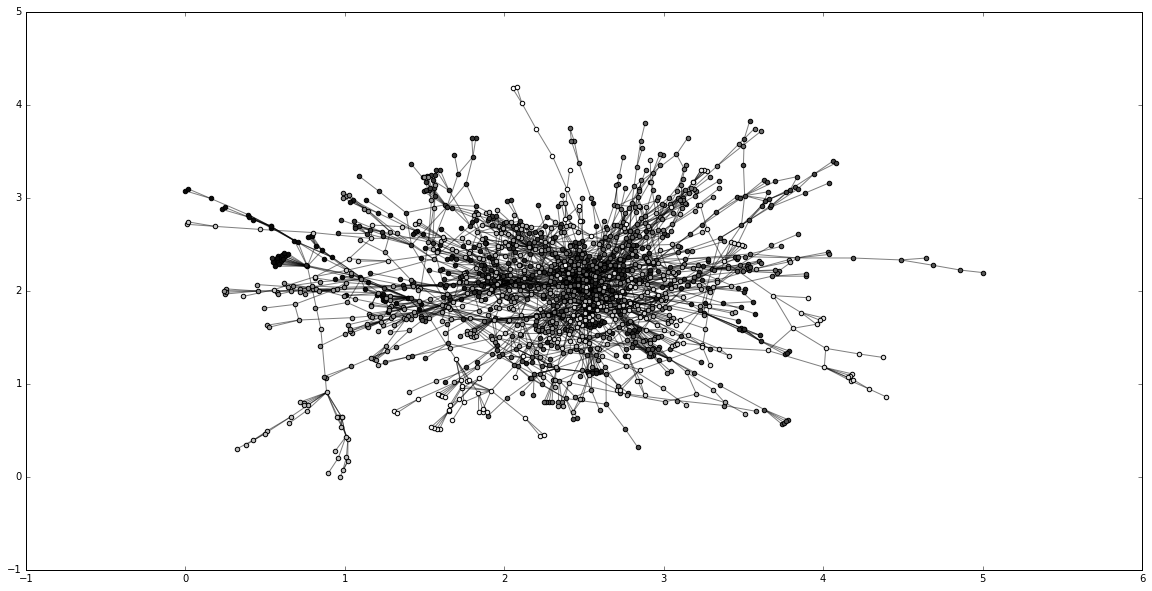

In [41]:
#first compute the best partition
partition = community.best_partition(H)

#drawing
plt.figure(num=None, figsize=(20, 10), dpi=1500)    
size = float(len(set(partition.values())))
pos=nx.spring_layout(H, scale=5)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(H, pos, list_nodes, node_size = 20, node_color = str(count / size))

nx.draw_networkx_edges(H,pos,alpha=0.5)
plt.show()

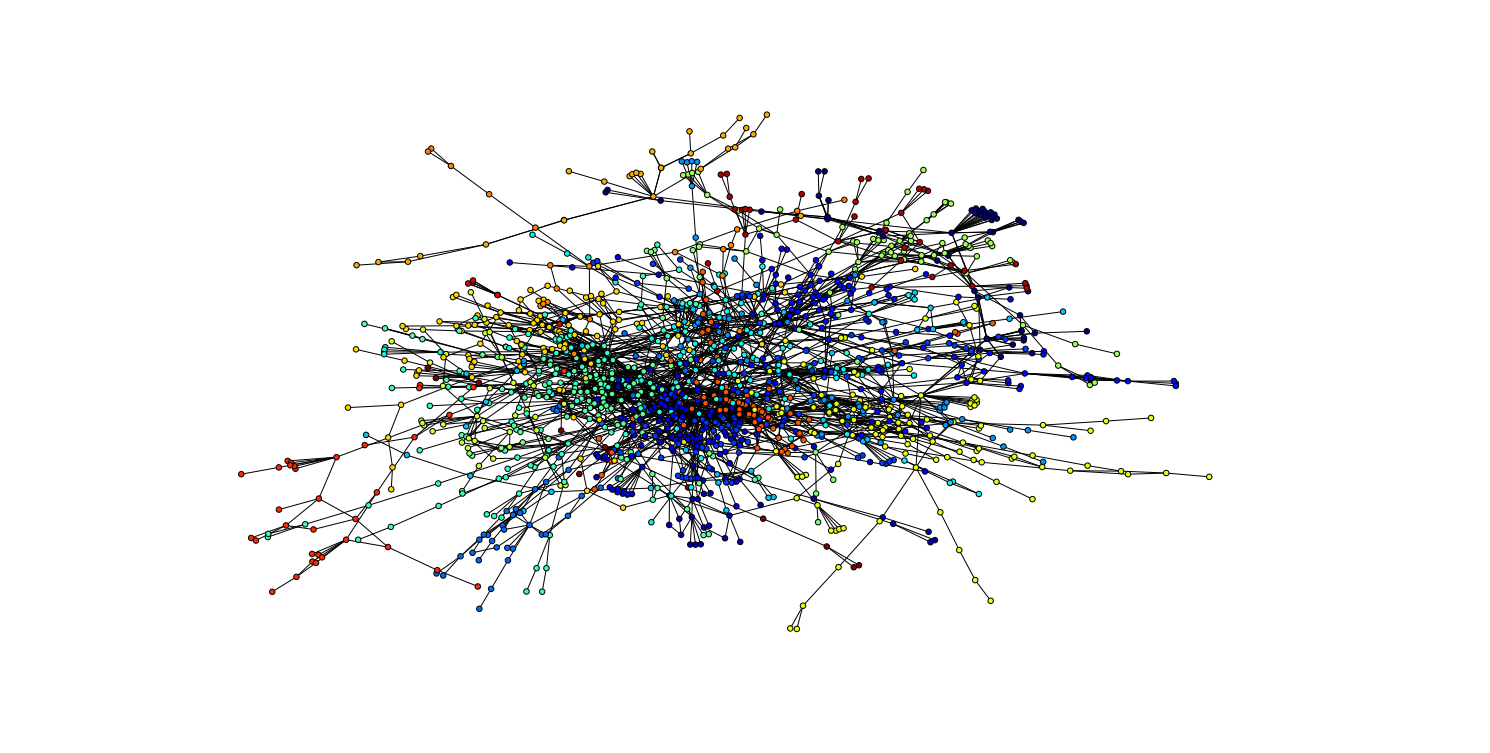

In [42]:
part = community.best_partition(H)
pos=nx.spring_layout(H, scale=5)
values = [part.get(node) for node in H.nodes()]
plt.figure(num=None, figsize=(20, 10), dpi=1500)    
nx.draw_spring(H, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)
plt.show()

In [ ]:
mod = community.modularity(part,H)
print("modularity:", mod)

In [ ]:
#shortest paths
shortest_p=nx.shortest_path(G)


In [ ]:
#weakly connected
#G = max(nx.weakly_connected_component_subgraphs(G,copy=True),key=len)
#giant connected
#H = max(nx.connected_component_subgraphs(H,copy=True), key=len)

In [ ]:
#getting the betweennness centrality of the philosophers in the philosopherrs network generated above using netwrokx package
#betweenness_centrality_dict = nx.betweenness_centrality(G)
betweenness_centrality_dict = nx.betweenness_centrality(H)

sorted_betweenness_centrality = sorted(betweenness_centrality_dict.items(), key=operator.itemgetter(1),reverse=True)
for i in range(5):
    print "The Course named: %s. \t Betweenness centrality value is: %s." %(sorted_betweenness_centrality[i][0],sorted_betweenness_centrality[i][1])

In [ ]:
#Getting eigenvalue centrality for each node(philosopher) in-degree and out-degree using the networkx package
"""
in_eigen_centrality = nx.eigenvector_centrality(G)
out_eigen_centrality = G.reverse()
out_eigen_centrality = nx.eigenvector_centrality(out_eigen_centrality)
sorted_in_eigen_centrality= sorted(in_eigen_centrality.items(), key=operator.itemgetter(1),reverse=True)
sorted_out_eigen_centrality= sorted(out_eigen_centrality.items(), key=operator.itemgetter(1),reverse=True)
"""

In [ ]:
"""
for i in range(5):
    print "The course name is: %s. \t \t  In-degree Eigenvector centrality value is: %s." %(sorted_in_eigen_centrality[i][0],sorted_in_eigen_centrality[i][1])
"""

In [ ]:
"""
for i in range(5):
    print "The course name is: %s. \t \t Out-degree Eigenvector centrality value is: %s." %(sorted_out_eigen_centrality[i][0],sorted_out_eigen_centrality[i][1])
"""

In [ ]:
#the shortest path can show which courses you have to have to gain acess to a specific course
shortest_p